# Set environment

In [1]:
### basic tools
import numpy as np
import scipy.linalg as la
import sympy as sym

### display and plot
from pprint import pprint
import matplotlib.pyplot as plt

**1**. (20 points)

Consider the linear transformation $f(x)$ on $\mathbb{R}^3$ that takes the standard basis $\left\{e_1,e_2,e_3\right\}$ to $\left\{v_1,v_2,v_3\right\}$ where

$$v_1=\left(\begin{matrix}10\\-10\\16\end{matrix}\right), v_2=\left(\begin{matrix}2\\-5\\20\end{matrix}\right) \textrm {and } v_3=\left(\begin{matrix}1\\-4\\13\end{matrix}\right)$$

1. Write a matrix $A$ that represents the same linear transformation. (4 points)

2. Compute the rank of $A$ using two different methods (do not use `matrix_rank`!). (4 points)

3. Find the eigenvalues and eigenvectors of $A$. (4 points)

4. What is the matrix representation of $f$ with respect to the eigenbasis? (8 points)

-----

# Q1.1 Write a matrix  A  that represents the same linear transformation

In [2]:
v1 = np.array([10, -10, 16])
v2 = np.array([ 2, -5,  20])
v3 = np.array([ 1, -4,  13])
A  = np.c_[v1, v2, v3]
print(A)

[[ 10   2   1]
 [-10  -5  -4]
 [ 16  20  13]]


# Q1.2 Compute the rank of $A$ using two different methods (do not use `matrix_rank`!)

## Method 01

since the determinant of matrix A is far from zero, we know that the rank of matrix A is full rank; that is, the rank of the matrix is 3

In [3]:
np.linalg.det(A)

161.99999999999977

## Method 02

By getting the row reduced echelon form, we can get the pivot columns and free columns of the matrix. Since there are no free columns, we know that the columns of A are linear independent, and thus, the rank of matrix is 3. 

In [4]:
sym.Matrix(A).rref()

(Matrix([
 [1, 0, 0],
 [0, 1, 0],
 [0, 0, 1]]), (0, 1, 2))

# Q1.3 Find the eigenvalues and eigenvectors of $A$.

In [5]:
eig_lda, eig_vec = la.eig(A)
eig_lda = np.real(eig_lda)

In [6]:
### eigenvalues
eig_lda

array([9., 3., 6.])

In [7]:
### normalized eigenvectors
eig_vec

array([[ 5.77350269e-01,  6.31950024e-16, -1.20385853e-01],
       [-5.77350269e-01, -4.47213595e-01, -2.40771706e-01],
       [ 5.77350269e-01,  8.94427191e-01,  9.63086825e-01]])

# Q1.4 What is the matrix representation of $f$ with respect to the eigenbasis?

The matrix representation of the linear operator A with respect to the eigenbasis is the diagonal matrix of eigenvalues

In [8]:
np.diag(eig_lda)

array([[9., 0., 0.],
       [0., 3., 0.],
       [0., 0., 6.]])

-----

**2**. (20 points)

You are given the following x-y coordinates (first column is x, second is y)

```
array([[  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])
```

- Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data. 
- Plot the data and fitted curve using `matplotlib`.

Note: Use `numpy.linalg.leastsq` function to solve this.

# Q2.1 Find the coefficients $(a, b, c)$ of the least-squares fit of a quadratic function $y = a + bx + cx^2$ to the data.

In [9]:
dat = np.array([
       [  0.        ,   4.12306991],
       [  3.        , -15.47355729],
       [  4.        , -11.68725507],
       [  3.        , -20.33756693],
       [  5.        ,  -6.06401989],
       [  6.        ,  32.79353057],
       [  8.        ,  82.48658405],
       [  9.        ,  84.02971858],
       [  4.        ,  -1.30587276],
       [  8.        ,  68.59409878]])

Create Design matrix for model: $y = a + bx + cx^2$

In [10]:
### the x of data
x = dat[:,0]

### create Design matrix
X = np.c_[np.ones(len(x)), x, x**2]
print(X)

[[ 1.  0.  0.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  8. 64.]
 [ 1.  9. 81.]
 [ 1.  4. 16.]
 [ 1.  8. 64.]]


Solve the system

In [11]:
### the y of data
y = dat[:, 1]

### solve the system
β, residual, rank, s = la.lstsq(X, y)

show the results

In [12]:
### paramteres
β

array([ -0.35762896, -11.78531232,   2.53125199])

In [13]:
### residuals
residual

842.0494779002936

# Q2.2 Plot the data and fitted curve using `matplotlib`

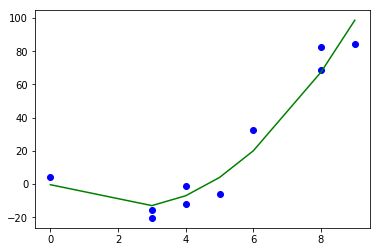

In [14]:
### calculate fitted value
yhat = X @ β

### plot the data points
plt.plot(x, y, 'bo')

### plot the curve from least square
idx = np.argsort(x)
plt.plot(x[idx], yhat[idx], 'g-')

-----

**3**. (20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy.
2. Show that $A$ is positive-definite
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.




# Q3.1 Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy.

In [15]:
A = np.array([
    [ 2, -1,  1],
    [-1,  2, -1],
    [ 1, -1,  1]
])

b = np.array([6, 2, 1]).reshape(-1, 1)

# Q3.2 Show that $A$ is positive-definite

Since all the eigenvalues are larger than zero, the matrix A is positive-definite

In [16]:
eig_lda, eig_vec = la.eig(A)
eig_lda = np.real(eig_lda)
print(eig_lda)

[3.73205081 1.         0.26794919]


# Q3.3 Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system. Remember to use the structure of the problem to determine the appropriate decomposition.

## Since the matrix is symmetric and positive-definite, we can apply Cholesky decomposition

In [17]:
L = la.cholesky(A, lower = True)
L

array([[ 1.41421356,  0.        ,  0.        ],
       [-0.70710678,  1.22474487,  0.        ],
       [ 0.70710678, -0.40824829,  0.57735027]])

show that the results is indeed the lower triangular matrix from cholesky decomposition

In [18]:
np.allclose(A, L @ L.T)

True

## Solve the system

**the original equation: $Ax = b$**

$\Rightarrow$ After Cholesky decomposition, we can rewrite the equation into: $LL^Tx = b$

$\Rightarrow$ if we let $L^Tx = y$, the equation becomes: $Ly = b$

**To solve the system, we can perform the forward substitution for $Ly = b$**

In [19]:
y = la.solve_triangular(L, b, lower = True)
print(y.reshape(-1, 1))

[[ 4.24264069]
 [ 4.0824829 ]
 [-0.57735027]]


**We can finally perform backward substitution of $L^Tx = y$ to get the solution**

In [20]:
x = la.solve_triangular(L.T, y, lower=False)
print(x.reshape(-1, 1))

[[ 5.]
 [ 3.]
 [-1.]]


## Shortcut for solving the system using Cholesky

In [21]:
C1 = la.cho_factor(A)
print(la.cho_solve(C1, b))

[[ 5.]
 [ 3.]
 [-1.]]


------

**4**. (40 points)

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)

- Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations. (15 points)

- Plot the data together with the fitted polynomial. (10 points)



# Q4.1 Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$.

import data

In [22]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
y = y.reshape(-1, 1)

create design matrix

In [23]:
X = np.c_[np.ones(len(x)), x, x**2]
pprint(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])


Find the least squares solution by using the normal equations

- Method 01

In [24]:
β1, res, rank, s = la.lstsq(X, y)
print(β1)

[[ 2.55079998]
 [ 7.31478229]
 [-2.04118936]]


- Method 02

In [25]:
A = X.T @ X
b = X.T @ y
β1, res, rank, s = la.lstsq(A, b)
print(β1)

[[ 2.55079998]
 [ 7.31478229]
 [-2.04118936]]


# Q4.2 Write your own **gradient descent** optimization function to find the least squares solution for the coefficients $\beta$ of a quadratic polynomial. Do **not** use a gradient descent algorithm from a package such as `scipy-optimize` or `scikit-learn`.  You can use a simple for loop - start with the parameters `beta = np.zeros(3)` with a learning rate $\alpha = 0.0001$ and run for 100000 iterations.

### helper function for gradient descent of quadratic polynomal regression

The helper functions include the calculation of residual and gradient.

In [26]:
def residual(β, X, y):
    """calculate residuals"""
    β = β.reshape(-1,1) ### technical issue
    return (y - X @ β).T @ (y - X @ β)
    
def gradient1(f, β, X, y, epsilon = 0.00001):
    """numerically approximate gradient of the input function f by definition"""
    grad = np.array([
        f(np.array([β[0] + epsilon, β[1], β[2]]), X, y) - f(β, X, y),
        f(np.array([β[0], β[1] + epsilon, β[2]]), X, y) - f(β, X, y),
        f(np.array([β[0], β[1], β[2] + epsilon]), X, y) - f(β, X, y)
    ])
    
    grad /= epsilon
    return grad.reshape(-1, 1)

def gradient2(β, X, y, epsilon = 0.00001):
    """calculate gradient of residual function
    grad = -2 * X.T @ (y - X @ β)
    """
    grad = X.T @ X @ β - X.T @ y
    return grad

### perform gradient descent --- Method 01 (gradient calculated from numerically approximation)

Note that for the first method, it converge with smaller learning rate comparing to the method 02 under the fixed iteration.

In [27]:
### initialization
β = np.zeros(3).reshape(-1, 1)
num_iter  = 100000
α = 0.00005

### gradient descent
for _ in range(num_iter):
    β = β - α * gradient1(residual, β, X, y)
    
print(β)

[[ 2.5493968 ]
 [ 7.31586574]
 [-2.04131136]]


perform gradient descent --- Method 02 (gradient calculated from exact formula)

In [28]:
### initialization
β = np.zeros(3).reshape(-1, 1)
num_iter  = 100000
α = 0.0001

### gradient descent
for _ in range(num_iter):
    β = β - α * gradient2(β, X, y)
    
print(β)

[[ 2.55080089]
 [ 7.31478187]
 [-2.04118932]]


# Q4.3 Plot the data together with the fitted polynomial.

I have plotted the quadratic polynomial function resulted from least square in the scatter plot. I have also compared it with the one acquired from scipy optimize function. Surprisingly, the one from <font color = 'green'>least square (green)</font> seems to fit better than another one from <font color = 'red'>scipy optimization (red)</font>.

In [29]:
### initialization
import scipy.optimize as opt

### optimization
β0 = np.zeros(3)
β2 = opt.fmin(residual, β0, args=(X, y))

print(β2)

Optimization terminated successfully.
         Current function value: 1151.824004
         Iterations: 63
         Function evaluations: 123
[ 0.2803024   0.24517342 -1.0685999 ]


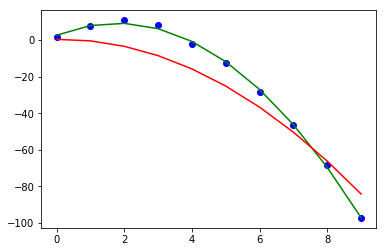

In [30]:
### calculate fitted value
yhat1 = X @ β1 # from lsq
yhat2 = X @ β2 # from opt

### plot the curve from least square and scipy optimize function
plt.plot(x, y, 'bo')
plt.plot(x, yhat1, 'g-')
plt.plot(x, yhat2, 'r-')